<a href="https://www.kaggle.com/code/tajmel/alphanum-keras-cnn?scriptVersionId=105549984" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [2]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import cv2

#keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [4]:
mnist = pd.read_csv("../input/mnist-in-csv/mnist_train.csv")
atoz = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
print("mnist: %s, atoz: %s, " %(mnist.shape, atoz.shape))

mnist: (60000, 785), atoz: (372450, 785), 


In [5]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist.label.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [7]:
atoz['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [8]:
atoz['0']+=10

In [9]:
mnist = mnist.sample(frac = 1)

In [10]:
atoz.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
atoz = atoz.sample(frac = 1)

In [12]:
atoz.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
41059,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358975,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318323,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113202,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229578,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train = pd.DataFrame( np.concatenate( (mnist.values, atoz.values), axis=0 ) )
del mnist
del atoz

In [14]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train.shape

(432450, 785)

In [17]:
print(train[0].unique())

[ 9  6  7  5  3  4  0  8  1  2 12 34 30 22 27 26 28 19 21 13 25 24 23 29
 17 35 10 32 33 16 14 11 31 20 15 18]


In [18]:
# Constants
HEIGHT = 28
WIDTH = 28

In [19]:
# Split x and y
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train


In [20]:
print(train_x.shape,train_y.shape)

(432450, 784) (432450,)


In [21]:
def reshape(image):
    image = image.reshape([HEIGHT, WIDTH])
    # image = np.fliplr(image)
    # image = np.rot90(image)
    return image

In [22]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = train_x.reshape(-1,28,28,1)
print ("train_x:",train_x.shape)

train_x: (432450, 28, 28, 1)


In [23]:
mapp={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}

Text(0.5, 1.0, '9')

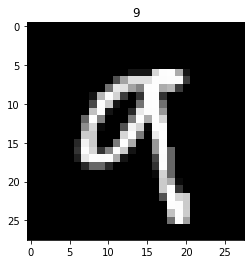

In [24]:
# plot image
plt.imshow(train_x[0], cmap=plt.get_cmap('gray'))
plt.title(mapp[train_y[0]])

In [25]:
train_y[0]

9

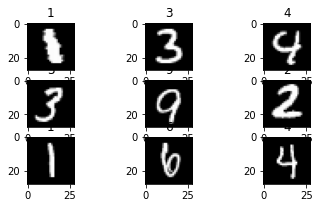

In [26]:
# plot image
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(mapp[train_y[i]])

In [27]:
# Normalise
train_x = train_x.astype('float32')
train_x /= 255

In [28]:
# number of classes
num_classes = train_y.nunique()

In [29]:
print(num_classes)

36


In [30]:
# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes)
print("train_y: ", train_y.shape)

train_y:  (432450, 36)


In [31]:
print("train: ",train_x.shape )

train:  (432450, 28, 28, 1)


In [32]:
# partition to train and val
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size= 0.20, random_state=7)

In [33]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.20, random_state=7)

In [34]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [35]:
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=34, input_shape=(28,28,1), kernel_size=(11,11), strides=(2,2), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=150, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=200, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=300, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=200, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(28,28,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.3))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.3))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.3))

#Output Layer
AlexNet.add(Dense(num_classes))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()


# # Building model
# # ((Si - Fi + 2P)/S) + 1
# model = Sequential()

# model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
#                  input_shape=(HEIGHT, WIDTH,1)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(units=num_classes, activation='softmax'))

# model.summary()

2022-09-13 07:42:06.692428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 07:42:06.853679: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 07:42:06.857997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 07:42:06.867028: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 34)        4148      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 34)        136       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 34)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 34)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 150)         127650    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 150)         600       
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 150)         0

In [36]:
AlexNet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [38]:
history = AlexNet.fit(train_x, train_y, epochs=50, batch_size=512, verbose=1, \
                    validation_data=(val_x, val_y),callbacks=[MCP,ES,RLP])

2022-09-13 07:42:10.632354: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 867944448 exceeds 10% of free system memory.
2022-09-13 07:42:12.211150: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 867944448 exceeds 10% of free system memory.
2022-09-13 07:42:13.077867: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 39854592 exceeds 10% of free system memory.
2022-09-13 07:42:13.114829: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-09-13 07:42:16.677638: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


541/541 [==============================] - ETA: 0s - loss: 0.4001 - accuracy: 0.9477

2022-09-13 07:42:44.648887: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 216986112 exceeds 10% of free system memory.


541/541 [==============================] - 34s 40ms/step - loss: 0.4001 - accuracy: 0.9477 - val_loss: 0.3298 - val_accuracy: 0.9394

Epoch 00001: val_accuracy improved from -inf to 0.93940, saving model to Best_points.h5


2022-09-13 07:42:47.238458: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% of free system memory.


Epoch 2/50
541/541 [==============================] - 20s 38ms/step - loss: 0.1520 - accuracy: 0.9751 - val_loss: 0.4986 - val_accuracy: 0.8524

Epoch 00002: val_accuracy did not improve from 0.93940
Epoch 3/50
541/541 [==============================] - 20s 38ms/step - loss: 0.1028 - accuracy: 0.9795 - val_loss: 0.1188 - val_accuracy: 0.9698

Epoch 00003: val_accuracy improved from 0.93940 to 0.96978, saving model to Best_points.h5
Epoch 4/50
541/541 [==============================] - 21s 38ms/step - loss: 0.0811 - accuracy: 0.9823 - val_loss: 0.1214 - val_accuracy: 0.9664

Epoch 00004: val_accuracy did not improve from 0.96978
Epoch 5/50
541/541 [==============================] - 20s 38ms/step - loss: 0.0677 - accuracy: 0.9840 - val_loss: 0.0832 - val_accuracy: 0.9771

Epoch 00005: val_accuracy improved from 0.96978 to 0.97714, saving model to Best_points.h5
Epoch 6/50
541/541 [==============================] - 21s 38ms/step - loss: 0.0581 - accuracy: 0.9858 - val_loss: 0.1014 - val_a

In [39]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc,title):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel(title)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [40]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

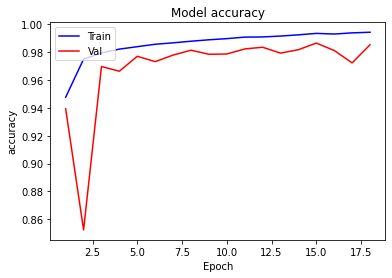

In [41]:
# Accuracy curve
plotgraph(epochs, acc, val_acc,"accuracy")

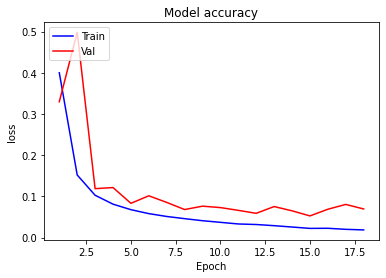

In [42]:
# loss curve
plotgraph(epochs, loss, val_loss,"loss")

In [43]:
score = AlexNet.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06783207505941391
Test accuracy: 0.9859174489974976
